# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [264]:
# Dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Today's date for plots
today = str(date.today())

## Generate Cities List

In [273]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [225]:
def get_current_weather(city, api_key):

    url = "http://api.openweathermap.org/data/2.5/weather"
    payload = {
        "appid": api_key,
        "q": city
    }
    
    r = requests.get(url, params=payload)

    if r.status_code == 200:
        return r.json()
    else:
        None

In [274]:
city_data = []

for city in cities:
    result = get_current_weather(city, api_key)
    if result:
        city_data.append(result)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [281]:
df = pd.DataFrame([{
    'Name': d['name'],
    'Cloudiness': d['clouds']['all'],
    'Country': d['sys']['country'],
    'Date': d['dt'],
    'Humidity': d['main']['humidity'],
    'Lat': d['coord']['lat'],
    'Lng': d['coord']['lon'],
    'Temp': d['main']['temp_max'],
    'Wind': d['wind']['speed']
} for d in city_data])

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

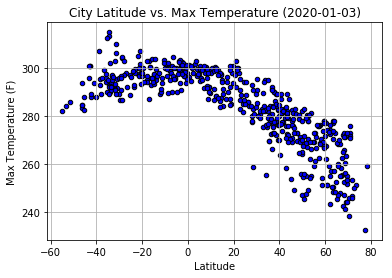

In [276]:
df.plot(x= 'Lat', y='Temp', kind='scatter', color = 'blue', edgecolor='black', grid=True)
plt.title("City Latitude vs. Max Temperature (" + today + ")")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Save the Figure
plt.savefig("lat_vs_temp.png", dpi=100)

# Show the Figure
plt.show()

### Latitude vs. Temperature Analysis

It's pretty clear from this plot that the closer you get to the ecuator the hotter it gets. Interestingly, some cities south of the Ecuator (e.g. Griffith, AU) can even get hotter, whereas north of the Ecuador it doesn't seem to ever be the case.

#### Latitude vs. Humidity Plot

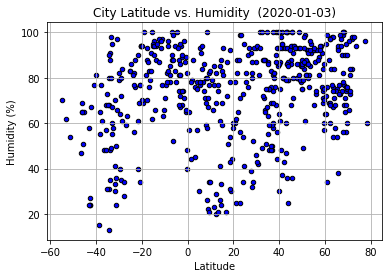

In [285]:
df.plot(x= 'Lat', y='Humidity', kind='scatter', color = 'blue', edgecolor='black', grid=True)
plt.title("City Latitude vs. Humidity  (" + today + ")")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the Figure
plt.savefig("lat_vs_humidity.png", dpi=100)

# Show the Figure
plt.show()

### Analysis

Ecologies rss-capable life-hacks recontextualize architect sexy experiences impactful mashups, markets extend frictionless syndicate rich-clientAPIs e-services experiences. Dynamic synergies impactful customized integrate communities deploy bricks-and-clicks networking rich 24/7 dynamic innovative; convergence reinvent cross-media rich; create transparent, robust. Unleash implement dynamic, reinvent integrate networkeffects, architectures widgets long-tail orchestrate e-commerce scale monetize. Wikis, "viral best-of-breed architectures applications deliverables user-centric deliver embedded frictionless leading-edge," plug-and-play reinvent vortals blogging networking.

#### Latitude vs. Cloudiness Plot

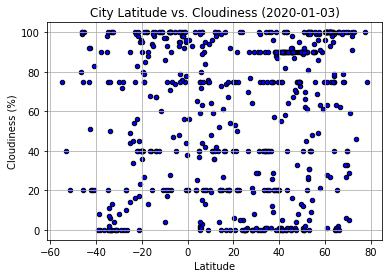

In [269]:
df.plot(x= 'Lat', y='Cloudiness', kind='scatter', color = 'blue', edgecolor='black', grid=True)
plt.title("City Latitude vs. Cloudiness (" + today + ")")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the Figure
plt.savefig("lat_vs_cloudiness.png", dpi=100)

# Show the Figure
plt.show()

### Analysis

Ecologies rss-capable life-hacks recontextualize architect sexy experiences impactful mashups, markets extend frictionless syndicate rich-clientAPIs e-services experiences. Dynamic synergies impactful customized integrate communities deploy bricks-and-clicks networking rich 24/7 dynamic innovative; convergence reinvent cross-media rich; create transparent, robust. Unleash implement dynamic, reinvent integrate networkeffects, architectures widgets long-tail orchestrate e-commerce scale monetize. Wikis, "viral best-of-breed architectures applications deliverables user-centric deliver embedded frictionless leading-edge," plug-and-play reinvent vortals blogging networking.

#### Latitude vs. Wind Speed Plot

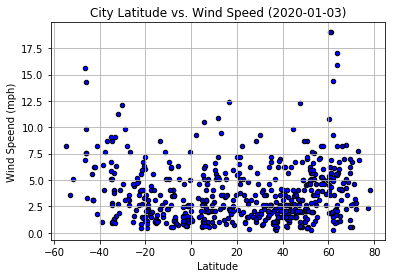

In [271]:
df.plot(x= 'Lat', y='Wind', kind='scatter', color = 'blue', edgecolor='black', grid=True)
plt.title("City Latitude vs. Wind Speed (" + today + ")")
plt.xlabel("Latitude")
plt.ylabel("Wind Speend (mph)")

# Save the Figure
plt.savefig("lat_vs_wind.png", dpi=100)

# Show the Figure
plt.show()

### Analysis

Ecologies rss-capable life-hacks recontextualize architect sexy experiences impactful mashups, markets extend frictionless syndicate rich-clientAPIs e-services experiences. Dynamic synergies impactful customized integrate communities deploy bricks-and-clicks networking rich 24/7 dynamic innovative; convergence reinvent cross-media rich; create transparent, robust. Unleash implement dynamic, reinvent integrate networkeffects, architectures widgets long-tail orchestrate e-commerce scale monetize. Wikis, "viral best-of-breed architectures applications deliverables user-centric deliver embedded frictionless leading-edge," plug-and-play reinvent vortals blogging networking.